### Column Label Dictionary

- date: Unixtime date when events occured.
- companyId
- jobId
- country: Country of job-posting.
- stateProvince: Name of the state or province of the job posting.
- city: Name of job posting city.
- avgOverallRating: Average rating of the company (1-5 stars), with 0s for non-rated companies.
- numReviews: Total number of reviews the company had.
- industry: Industry associated with the company.
- normTitle: The normalized / canonical job title.
- normTitleCategory: The category (similar to occupational category) of the norm title.
- descriptionCharacterLength: Number of characters in job description.
- descriptionWordCount: Number of words in job description.
- experienceRequired: Minimum experience required for the job in years.
- estimatedSalary: Estimated annual salary (0 when estimate not available).
- salaryCurrency: Salary currency.
- jobLanguage: Job language.
- supervisingJob: Whether this job is classified as a supervising job.
- licenseRequiredJob: Whether this job is classified as requiring a license.
- educationRequirements: The job's education requirement. Values ("None", "High School", "Higher Education").
- jobAgeDays: Age of job in days, based on job create date and on central timezone. Resets if job is 'refreshed'.
- clicks: The total number of clicks on the job on the date.
- localClicks: The total number of clicks on the job from a local user (same city and country) on the date.

### Import Essential Libraries & Load in Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext rpy2.ipython

In [3]:
df = pd.read_csv('E:\josh_data_science\Vassar Datafest 2018\Dataset_and_FeatureDictionary\indeed_cleaned.csv', encoding='cp1252')

In [4]:
# Remove unnecessary column
del df['Unnamed: 0']

In [5]:
df_us = df.copy()[df.copy().country=='US']
df_can = df.copy()[df.copy().country=='CA']
df_ger = df.copy()[df.copy().country=='DE']

### How does avgOverallRating differ in these 3 countries?

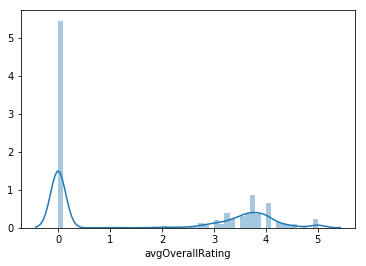

In [6]:
sns.distplot(df.groupby(['companyId','jobId']).first().avgOverallRating)

Except for the companies that are unrated (marked as 0), the distribution doesn't seem to be extremely skewed. Thus, I will exclude all the companies that are unrated from the avgOverallRating comparison.

In [7]:
print("U.S. Mean Company Rating:", df_us.groupby(['companyId','jobId']).first().query('avgOverallRating!=0').avgOverallRating.mean())
print("Canada Mean Company Rating:", df_can.groupby(['companyId','jobId']).first().query('avgOverallRating!=0').avgOverallRating.mean())
print("Germany Mean Company Rating:", df_ger.groupby(['companyId','jobId']).first().query('avgOverallRating!=0').avgOverallRating.mean())

U.S. Mean Company Rating: 3.687309829171085
Canada Mean Company Rating: 3.785130394997745
Germany Mean Company Rating: 3.7813881158946216


Let's perform Kruskal-Wallis H-test (Since the assumptions for ANOVA such as homoscedasticity are not satisfied) to see if there is a statistically significant difference in means.

In [8]:
from scipy.stats import ttest_ind
from scipy.stats import kruskal

In [9]:
kruskal(df_us.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist(),
       df_can.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist(),
       df_ger.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist())

C:\Users\josh\Anaconda3\lib\site-packages\scipy\stats\stats.py:5056: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


KruskalResult(statistic=95113514.390495941, pvalue=0.0)

Seems to be getting an error because the length of the array is too long to perform Kruskal-Wallis H-test. Instead, I will perform 2 sample independent t-test on three pairs.

In [10]:
ttest_ind(df_us.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist(),
         df_can.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist()
          ,equal_var=False)

Ttest_indResult(statistic=-16.710886559092195, pvalue=4.2035668598517366e-62)

In [11]:
ttest_ind(df_us.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist(),
         df_ger.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist()
          ,equal_var=False)

Ttest_indResult(statistic=-12.88967187311715, pvalue=8.7814634044284521e-38)

In [12]:
ttest_ind(df_can.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist(),
         df_ger.groupby(['companyId','jobId']).first().query('avgOverallRating!=0.0').reset_index().avgOverallRating.tolist()
          ,equal_var=False)

Ttest_indResult(statistic=0.40724836760561778, pvalue=0.68382925573211839)

No pairs have statistically significant evidence to claim that any pair of the means of company rating are different

### How does numReviews differ in these 3 countries?

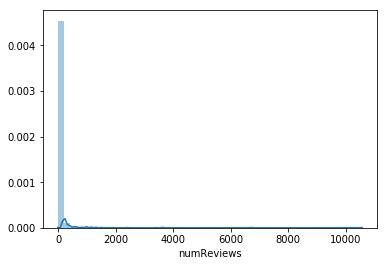

In [13]:
sns.distplot(df.groupby(['companyId','jobId']).first().numReviews)

I will exclude all the companies that are unrated from the numReviews comparison.

In [14]:
print("Median # of Reviews for U.S. companies :", df_us.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews.median())
print("Median # of Reviews for Canada companies:", df_can.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews.median())
print("Median # of Reviews for Germany companies:", df_ger.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews.median())

Median # of Reviews for U.S. companies : 70.0
Median # of Reviews for Canada companies: 57.0
Median # of Reviews for Germany companies: 58.0


I will perform median_test (t-test equivalent for medians) to see if there are any significant statistical differences

In [15]:
from scipy.stats import median_test

In [16]:
median_test(df_us.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews,
           df_can.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews)[1]

1.8054653504355537e-106

In [17]:
median_test(df_us.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews,
           df_ger.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews)[1]

0.0

In [18]:
median_test(df_can.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews,
           df_ger.groupby(['companyId','jobId']).first().query('numReviews!=0').numReviews)[1]

0.066406880505994831

There is statistically significant evidence (p value < 0.05) that U.S. companies have larger number of reviews than Canadian and German firms. In other words, there are more information about U.S. companies than Canadian and German firms in Indeed.com.

### Industry Distribution?

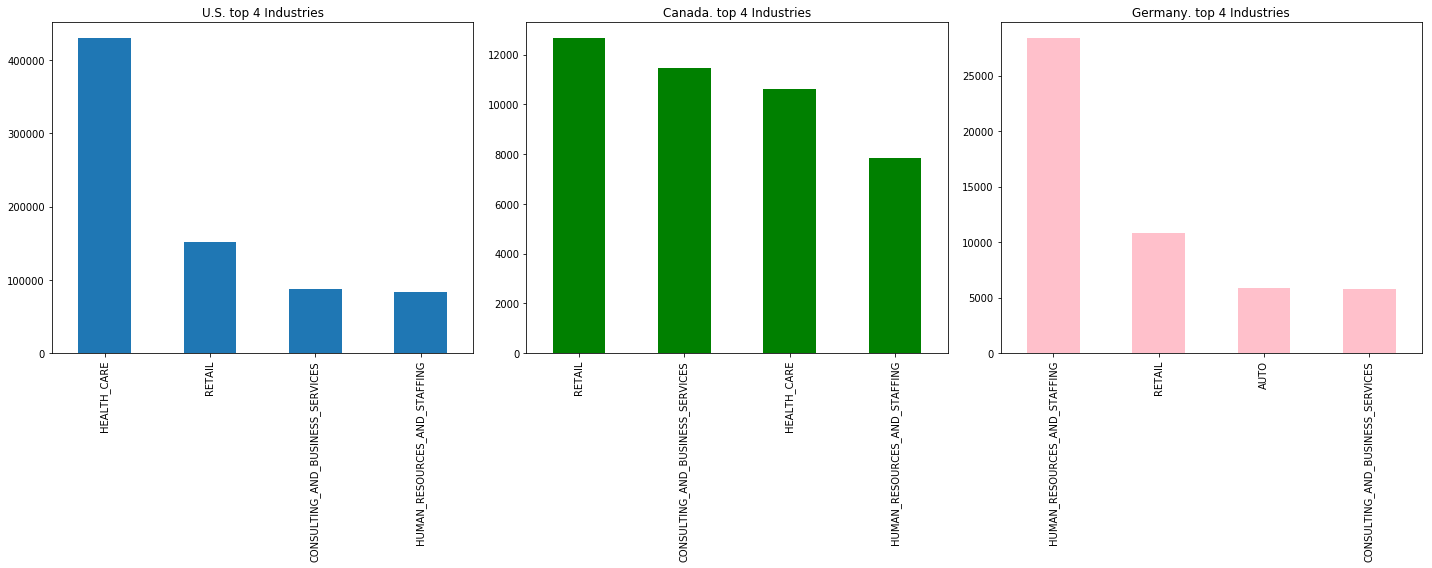

In [19]:
f,((ax1,ax2, ax3)) = plt.subplots(1,3,figsize=(20,8))
df_us.industry.value_counts()[1:5].plot('bar', ax=ax1, title='U.S. top 4 Industries')
df_can.industry.value_counts()[1:5].plot('bar', ax=ax2, color='Green', title='Canada. top 4 Industries')
df_ger.industry.value_counts()[1:5].plot('bar', ax=ax3, color='Pink', title='Germany. top 4 Industries')
plt.tight_layout()

### normTitleCategory Distribution?

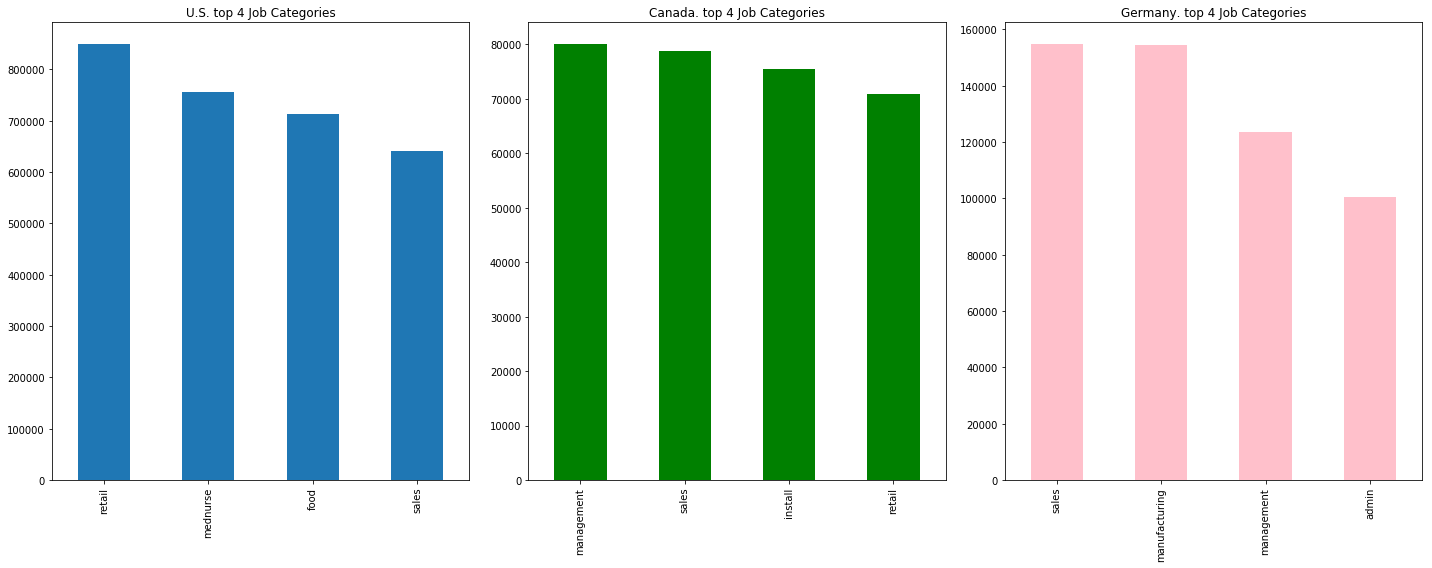

In [20]:
f,((ax1,ax2, ax3)) = plt.subplots(1,3,figsize=(20,8))
df_us.normTitleCategory.value_counts()[1:5].plot('bar', ax=ax1, title='U.S. top 4 Job Categories')
df_can.normTitleCategory.value_counts()[1:5].plot('bar', ax=ax2, color='Green', title='Canada. top 4 Job Categories')
df_ger.normTitleCategory.value_counts()[1:5].plot('bar', ax=ax3, color='Pink', title='Germany. top 4 Job Categories')
plt.tight_layout()

### experienceRequired v.s. estimatedSalary in each industry for three different countries

In [21]:
top4_industry = df.industry.value_counts()[1:5].index.tolist()

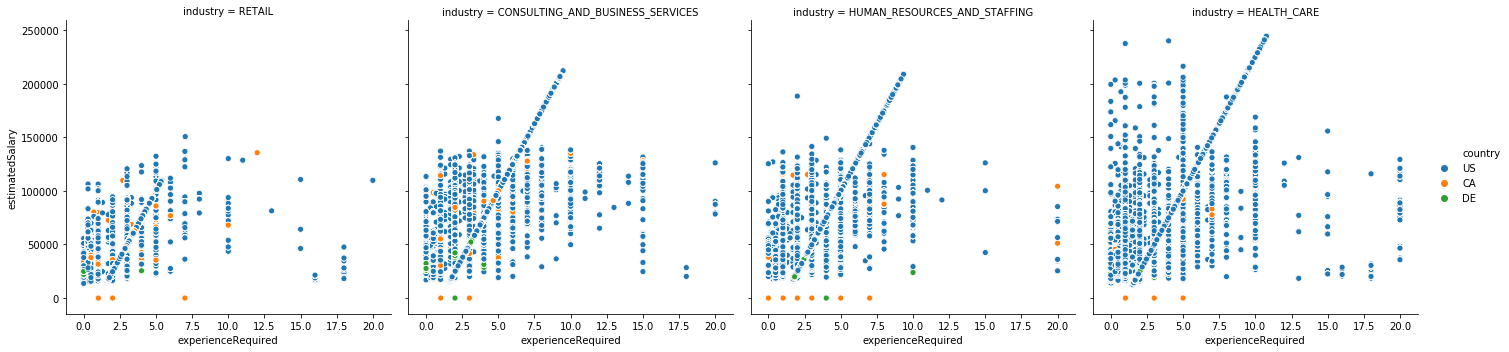

In [22]:
sns.relplot(x="experienceRequired", y="estimatedSalary", hue="country", col='industry', data=df[df.industry.isin(top4_industry)])

Not much pattern is seen here but for the U.S., the healthcare sector has larger variance on both the x and y axes due to job postings that pay exceptionally high(about 180K+) and that require long years of prior experience

### Click Number Comparison

In [23]:
# Mean & Median of clicks by country
df.groupby(['country']).clicks.agg(['mean','median'])

,mean,median
country,,
CA,27.069116,19
DE,17.577621,16
US,22.810701,18


Both mean and median values tell us job postings in California got the most clicks overall, followed by U.S. and Germany

In [24]:
# Mean & Median of clicks by industries in each country
df.groupby(['country','industry']).clicks.agg(['mean','median']).sort_values(['mean','median'], ascending=False).iloc[:7]

mean  median
country industry                                                              
CA      CONSULTING_AND_BUSINESS_SERVICES,INTERNET_AND_S...  205.571429   202.0
US      TRANSPORT_AND_FREIGHT,AEROSPACE_AND_DEFENSE         169.214286   139.5
        BANKS_AND_FINANCIAL_SERVICES,ORGANIZATION           143.500000   142.5
        BANKS_AND_FINANCIAL_SERVICES,FOOD_AND_BEVERAGES     108.333333   113.0
        HUMAN_RESOURCES_AND_STAFFING,INDUSTRIAL_MANUFAC...   76.571429    80.0
        FOOD_AND_BEVERAGES,BANKS_AND_FINANCIAL_SERVICES      76.500000    59.0
CA      INDUSTRIAL_MANUFACTURING,TELECOMMUNICATIONS          75.063291    30.0

Top 7 that got the most clicks overall were consulting, tech industries in Canada, finance and HR sectors in U.S. followed by Canada's Industrial Manufacturing industry

In [27]:
# Mean & Median of clicks of supervising jobs / non-supervising jobs in each country
df[df.supervisingJob!=2.0].\
groupby(['country','supervisingJob']).clicks.agg(['mean','median']).sort_values(['mean','median'], ascending=False)

mean  median
country supervisingJob                   
CA      0.0             28.463899      20
        1.0             27.535634      20
US      0.0             23.029486      18
        1.0             21.650766      18
DE      1.0             17.275376      16
        0.0             16.881475      16

Non-supervising jobs got slightly more clicks in Canada and U.S. but it's the other way around for Germany. Nonetheless, the difference between the overall clicks of superivising & non-supervising jobs isn't big. 

In [29]:
# Mean & Median of clicks by education requirement in each country
df[df.educationRequirementsRequirements!='UNKNOWN'].\
groupby(['country','educationRequirements']).clicks.agg(['mean','median']).sort_values(['mean','median'], ascending=False) 

mean  median
country educationRequirements                   
CA      High School            30.426333      20
        Higher Education       29.337731      20
        None                   27.440450      20
US      High School            25.493848      19
DE      High School            23.397452      18
US      Higher Education       23.322859      19
        None                   21.275185      17
DE      Higher Education       16.931752      16
        None                   16.800540      16

For all three countries, job postings with lower level of education requirements tend to receive larger number of clicks than those that require higher education. But this is not true when it comes to high school education requirement v.s. None.